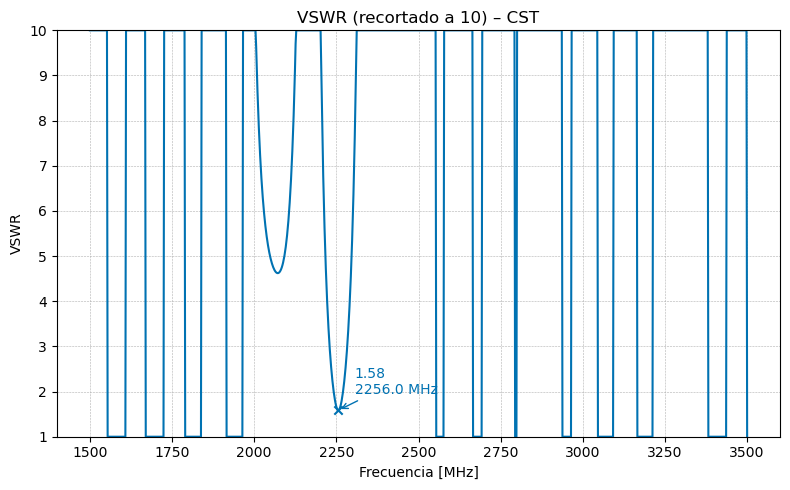

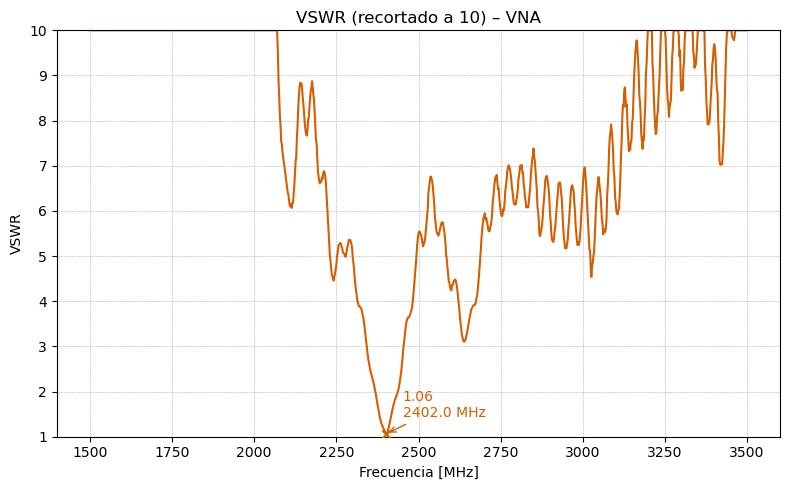

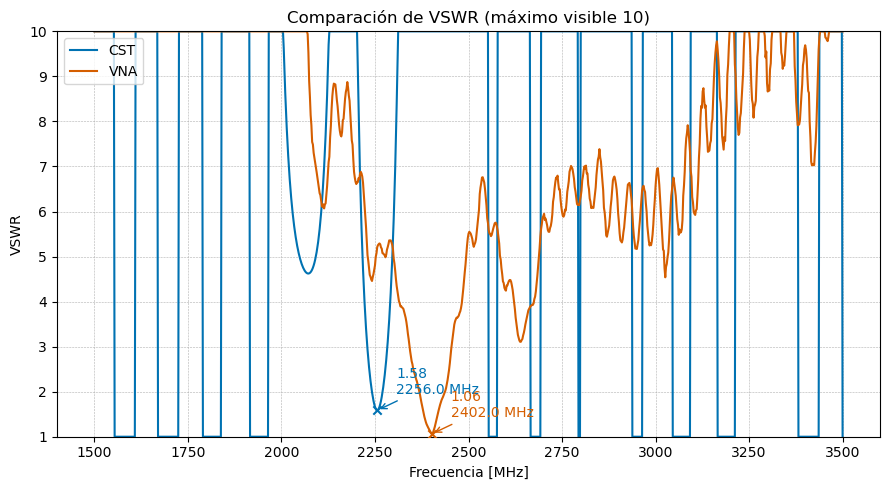

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Rutas
CST_VSWR_PATH  = "D:\Facultad\Electromagnetismo_2\Antena_Patch\Antena_Patch_2.4GHz_2x2\Resultados Antena/VSWR_CST.txt"
MATP_SWR_PATH  = "D:\Facultad\Electromagnetismo_2\Antena_Patch\Antena_Patch_2.4GHz_2x2\Resultados Antena/MATP_SWR_CSV (2).csv"

# ------------------------- leer CST ------------------------------
freq_cst, vswr_cst = [], []
with open(CST_VSWR_PATH) as f:
    for ln in f:
        ln = ln.strip()
        if not ln or ln.startswith(("#", '"')):
            continue
        f_mhz, swr = ln.split("\t")[:2]
        freq_cst.append(float(f_mhz))
        vswr_cst.append(float(swr))
df_cst = pd.DataFrame({"Frequency_MHz": freq_cst, "VSWR": vswr_cst})

# ------------------------- leer CSV ------------------------------
freq_matp, vswr_matp, inside = [], [], False
with open(MATP_SWR_PATH) as f:
    for ln in f:
        ln = ln.strip()
        if not ln or ln.startswith("!"): continue
        if ln == "BEGIN": inside = True;  continue
        if ln == "END":   break
        if inside:
            f_hz, swr = ln.split(",")[:2]
            freq_matp.append(float(f_hz)/1e6)      # Hz → MHz
            vswr_matp.append(float(swr))
df_matp = pd.DataFrame({"Frequency_MHz": freq_matp, "VSWR": vswr_matp})

# ---------- target points a marcar ----------
target_cst  = 2256.0   # MHz
target_matp = 2402.0   # MHz
def nearest(df, f_obj):
    idx = (df["Frequency_MHz"] - f_obj).abs().idxmin()
    return df.loc[idx, "Frequency_MHz"], df.loc[idx, "VSWR"]

f_cst,  v_cst  = nearest(df_cst,  target_cst)
f_matp, v_matp = nearest(df_matp, target_matp)

# ---------- función de dibujo (recorte VSWR a 10) ---------------
def plot_vswr(df, label, f_mark, v_mark, color="C0"):
    plt.plot(df["Frequency_MHz"], np.minimum(df["VSWR"], 10), label=label, color=color)
    v_clip = min(v_mark, 10)
    plt.scatter(f_mark, v_clip, color=color, marker="x", zorder=5)
    plt.annotate(f"{v_mark:.2f}\n{f_mark:.1f} MHz",
                 (f_mark, v_clip),
                 xytext=(f_mark+50, v_clip+0.3),
                 ha="left", va="bottom", color=color,
                 arrowprops=dict(arrowstyle="->", color=color))

# ----------------- gráfica individual CST -----------------------
plt.figure(figsize=(8,5))
plot_vswr(df_cst, "VSWR_CST.txt", f_cst, v_cst, color="#0072B2")
plt.title("VSWR (recortado a 10) – CST")
plt.xlabel("Frecuencia [MHz]")
plt.ylabel("VSWR")
plt.ylim(1, 10)
plt.grid(True, ls="--", lw=0.4)
plt.tight_layout()
plt.show()

# ----------------- gráfica individual MATP ----------------------
plt.figure(figsize=(8,5))
plot_vswr(df_matp, "MATP_SWR_CSV (2).csv", f_matp, v_matp, color="#D55E00")
plt.title("VSWR (recortado a 10) – VNA")
plt.xlabel("Frecuencia [MHz]")
plt.ylabel("VSWR")
plt.ylim(1, 10)
plt.grid(True, ls="--", lw=0.4)
plt.tight_layout()
plt.show()

# ------------------ comparativa superpuesta ---------------------
plt.figure(figsize=(9,5))
plot_vswr(df_cst,  "CST",        f_cst,  v_cst,  color="#0072B2")
plot_vswr(df_matp, "VNA", f_matp, v_matp, color="#D55E00")
plt.title("Comparación de VSWR (máximo visible 10)")
plt.xlabel("Frecuencia [MHz]")
plt.ylabel("VSWR")
plt.ylim(1, 10)
plt.legend()
plt.grid(True, ls="--", lw=0.4)
plt.tight_layout()
plt.show()
